# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [66]:
#import pandas and other important
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [67]:
#read all input data
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

#looking at data, checking info to see what float values need to be changed and what columns are missing    
#df.info()    
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Conclusion

There are a lot of missing values in a lot of the columns and differences in models such as ford f150 and ford f-150

## Data preprocessing

In [74]:
#2  Data preprocessing

#was used to identify how many missing values existed which showed various amounts missing in model_year
#cylinders, odometer, paint_color, and is_4wd
#df.isna().sum()

    #listing all the info on the dataset to find what columns are missing
#print(df.info())

    #checking to see how many duplicates we have
#print(df.duplicated().sum())
#there weren't any duplicates, maybe there might be in model cars


    #checking to see if we have duplicate model cars
#print(df['model'].value_counts())

#columns where numbers were missing
missing_num = ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']

#this shows the means and medians of the missing numbers so we could potentially use them for filling in.
#The mean is higher than the median in a lot of cases, so I think it's better to use median to fill in the missing values
#print('These are the means:')
#print(df.groupby('model')[missing_num].mean())
#print()
#print('These are the medians:')
#print(df.groupby('model')[missing_num].median())

#filling na by using groupby and calculating everything as median because the means are too high, meaning there are outliers
#in the data. Also filling in missing colors as "unknown", will need to fix later
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))
df['odometer'] = df['odometer'].fillna(df.groupby('model')['odometer'].transform('median'))
df['is_4wd'] = df['is_4wd'].fillna(df.groupby('model_year')['is_4wd'].transform('median'))
df['is_4wd'] = df['is_4wd'].fillna(df.groupby('model')['is_4wd'].transform('median'))
df['paint_color'] = df['paint_color'].fillna('unknown')

#double checking to see if there are still any more missing values
#df.isna().sum()

#there are still columns that are considered float values, so we'll have to change that for easier appearance
#df.info()

#turning float values to int using astype. There shouldn't be any float values or decimals for amonut of cylinders,
#what model_year the car is, if it's 4wd or not, or how much is in the odometer. It just makes more sense to 
#convert these to int for easier appearance.
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')

#checking to see if changing values worked
#df.info()

df.head(15)

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,1,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,1,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,1,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,1,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17


# Conclusion

There are too many models to look through, will probably have to find a way to look at the data eventually. For now, everything "seems" ok.

What could've caused the missing values could be entirely human error, or some data loss through corrupted file. Nothing seems too out of the ordinary, so I would suggest it's just human error

## Make calculations and add them to the table

In [34]:
# Step 3. Make calculations and add them to the table

#formatting datetime so day of the week, month, and year will be added
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')
df['week_posted'] = df['date_posted'].dt.weekday
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

#finding vehicle age and calculating average vehicle mileage
#replacing vehicle age from 0 to 0.5 so infinity won't be a result from mileage calc
df['vehicle_age'] = df['year_posted'] - df['model_year'] + 1
df['mileage'] = df['odometer'] / df['vehicle_age']

#checking to see if there were any messups from doing all the code
#df.info()

#converting to int for easier appearance
df['mileage'] = df['mileage'].astype('int')

#checking if there are any other conditions
df['condition'].value_counts()

#making a condition dictionary and applying to the column
condition_dictionary = {'salvage': 0, 'fair' : 1, 'good' : 2, 'excellent' : 3, 'like new' : 4, 'new' : 5 }
df['condition'] = df['condition'].apply(lambda x: condition_dictionary[x])

#checking work to see if all columns check out
df['condition'].value_counts()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price           51525 non-null int64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null int64
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null int64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
week_posted     51525 non-null int64
month_posted    51525 non-null int64
year_posted     51525 non-null int64
vehicle_age     51525 non-null int64
mileage         51525 non-null int64
dtypes: datetime64[ns](1), int64(12), object(5)
memory usage: 7.1+ MB


## Carry out exploratory data analysis

Lower bound: -12758.5
Upper bound: 34597.5


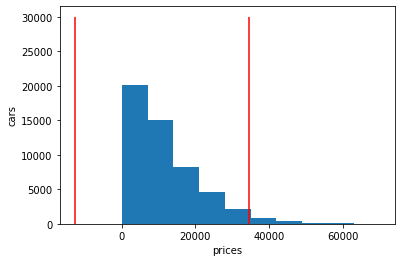

In [35]:
# Step 4. Carry out exploratory data analysis, following the instructions below (section #1)

# making simple histograms for every variable
#df['price'].plot(kind='hist', range=(0, 70000))
#df['vehicle_age'].plot(kind='hist', range=(0, 60))
#df['mileage'].plot(kind='hist', range=(0, 180000))
#df['cylinders'].plot(kind='hist', range=(0, 11))
#df['condition'].plot(kind='hist')

# this bottom code is to find general outliers and outputting with red lines for easy readability. Multiple
# blocks of code will show each variable with a histogram outputting outliers. This doesn't look pretty, and could
# probably be done in loops, but god i feel stupid trying to figure this out rn

Q1 = df['price'].quantile(.25)
Q3 = df['price'].quantile(.75)
IQR = Q3-Q1
outlier_upper_bound = Q3 + 1.5*IQR
outlier_lower_bound = Q1 - 1.5*IQR

df['price'].plot(kind='hist', range=(0,70000))
plt.ylabel('cars')
plt.xlabel('prices')

print('Lower bound:', outlier_lower_bound)
print('Upper bound:', outlier_upper_bound)

# plot red vertical lines at upper and lower bounds
plt.vlines(x=[outlier_lower_bound, outlier_upper_bound], ymin=0, ymax=30000, colors='red')

Lower bound: -7.0
Upper bound: 25.0


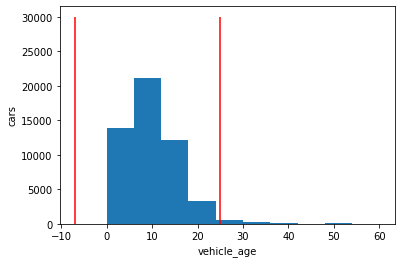

In [36]:
# vehicle_age
Q1 = df['vehicle_age'].quantile(.25)
Q3 = df['vehicle_age'].quantile(.75)
IQR = Q3-Q1
outlier_upper_bound = Q3 + 1.5*IQR
outlier_lower_bound = Q1 - 1.5*IQR

df['vehicle_age'].plot(kind='hist', range=(0,60))
plt.ylabel('cars')
plt.xlabel('vehicle_age')

print('Lower bound:', outlier_lower_bound)
print('Upper bound:', outlier_upper_bound)

# plot red vertical lines at upper and lower bounds
plt.vlines(x=[outlier_lower_bound, outlier_upper_bound], ymin=0, ymax=30000, colors='red')

Lower bound: -1889.0
Upper bound: 29399.0


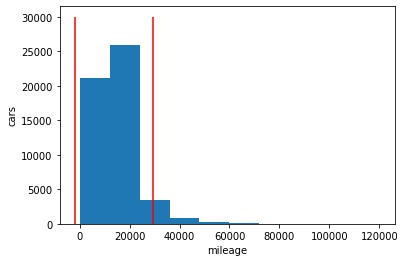

In [37]:
# Mileage
Q1 = df['mileage'].quantile(.25)
Q3 = df['mileage'].quantile(.75)
IQR = Q3-Q1
outlier_upper_bound = Q3 + 1.5*IQR
outlier_lower_bound = Q1 - 1.5*IQR

df['mileage'].plot(kind='hist', range=(0,120000))
plt.ylabel('cars')
plt.xlabel('mileage')

print('Lower bound:', outlier_lower_bound)
print('Upper bound:', outlier_upper_bound)

# plot red vertical lines at upper and lower bounds
plt.vlines(x=[outlier_lower_bound, outlier_upper_bound], ymin=0, ymax=30000, colors='red')

Lower bound: -2.0
Upper bound: 14.0


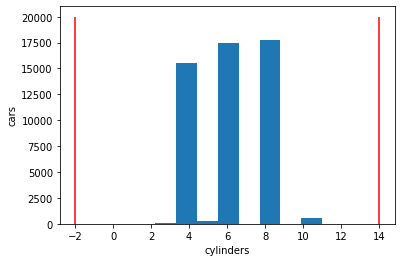

In [38]:
# Cylinders
Q1 = df['cylinders'].quantile(.25)
Q3 = df['cylinders'].quantile(.75)
IQR = Q3-Q1
outlier_upper_bound = Q3 + 1.5*IQR
outlier_lower_bound = Q1 - 1.5*IQR

df['cylinders'].plot(kind='hist', range=(0,11))
plt.ylabel('cars')
plt.xlabel('cylinders')

print('Lower bound:', outlier_lower_bound)
print('Upper bound:', outlier_upper_bound)

# plot red vertical lines at upper and lower bounds
plt.vlines(x=[outlier_lower_bound, outlier_upper_bound], ymin=0, ymax=20000, colors='red')

Lower bound: 0.5
Upper bound: 4.5


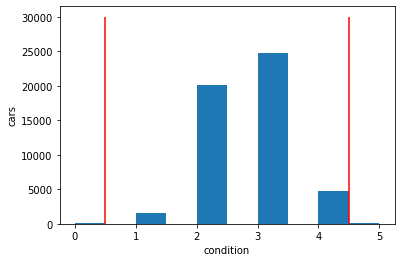

In [39]:
#Condition
Q1 = df['condition'].quantile(.25)
Q3 = df['condition'].quantile(.75)
IQR = Q3-Q1
outlier_upper_bound = Q3 + 1.5*IQR
outlier_lower_bound = Q1 - 1.5*IQR

df['condition'].plot(kind='hist')
plt.ylabel('cars')
plt.xlabel('condition')

print('Lower bound:', outlier_lower_bound)
print('Upper bound:', outlier_upper_bound)

# plot red vertical lines at upper and lower bounds
plt.vlines(x=[outlier_lower_bound, outlier_upper_bound], ymin=0, ymax=30000, colors='red')

Upper limit: 34597.5


Text(0.5, 0, 'price')

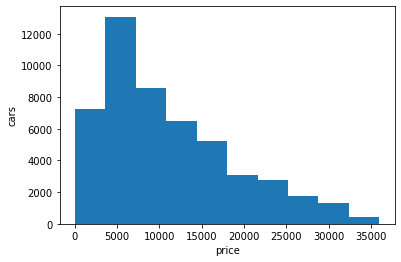

In [41]:
# Step 4. Carry out exploratory data analysis, following the instructions below (section #2)

#creating a copy of df to modify and get rid of outliers
filtered = df

#double checking to see if filtered has everything updated from df
#filtered.info()

Q1 = filtered['price'].quantile(.25)
Q3 = filtered['price'].quantile(.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

#this works, but I wish it was in a loop. Not sure how to do that though. This same code will be copied and pasted
#in the next upcoming cells. 
filtered = filtered.query('price < @upper')

# Step 4. Carry out exploratory data analysis, following the instructions below (section #3)

print('Upper limit:', upper)
filtered['price'].plot(kind='hist', range=(0, 36000))

plt.ylabel('cars')
plt.xlabel('price')

# There are a lot more vehicles that are around 5k available for purchase, and gradually becomes
# more rare the more expensive the cars get. Compared to the original histogram with outliers,
# there are some that are selling their cars for 40k, and some 60k. In this case, they are counted as outliers.

Upper limit: 25.0


Text(0.5, 0, 'vehicle_age')

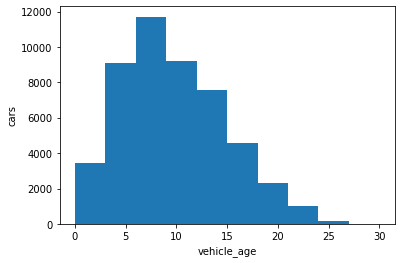

In [42]:
Q1 = filtered['vehicle_age'].quantile(.25)
Q3 = filtered['vehicle_age'].quantile(.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

filtered = filtered.query('vehicle_age < @upper')

#print(upper)
print('Upper limit:', upper)
filtered['vehicle_age'].plot(kind='hist', range=(0, 30))

plt.ylabel('cars')
plt.xlabel('vehicle_age')

# The majority of cars listed on the site are only a few years old, around 7.
# The outliers removed are any cars older than 24.
# Comparing to the original histogram, there weren't many cars older than 24 anyway.

Upper limit: 29076.0


Text(0.5, 0, 'mileage')

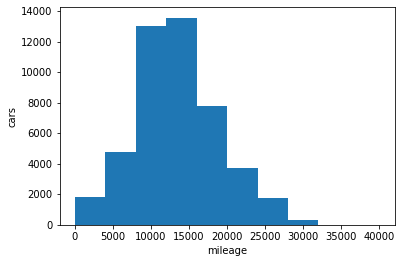

In [43]:
Q1 = filtered['mileage'].quantile(.25)
Q3 = filtered['mileage'].quantile(.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

filtered = filtered.query('mileage < @upper')

# print(upper)
print('Upper limit:', upper)
filtered['mileage'].plot(kind='hist', range=(0, 40000))

plt.ylabel('cars')
plt.xlabel('mileage')

# The average mileage on the cars is 15000, and seems to decrease steeply after anything over 20,000 mileage.
# Compared to the original histogram, there are a lot of outliers that have been removed, 
# some cars even reaching 120,000 mileage

Upper limit: 14.0


Text(0.5, 0, 'cylinders')

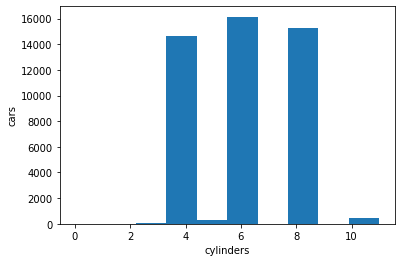

In [44]:
Q1 = filtered['cylinders'].quantile(.25)
Q3 = filtered['cylinders'].quantile(.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

print('Upper limit:', upper)
filtered = filtered.query('cylinders < @upper')

filtered['cylinders'].plot(kind='hist', range=(0, 11))

plt.ylabel('cars')
plt.xlabel('cylinders')

# There wasn't anything changed with cylinders, because everything was within range. No outliers, nothing to take away in 
# comparison to the original histogram

Text(0.5, 0, 'condition')

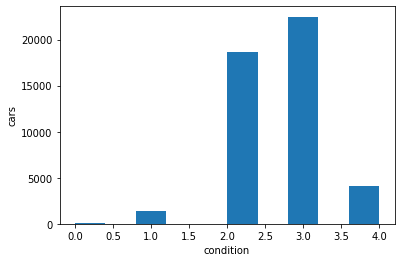

In [45]:
Q1 = filtered['condition'].quantile(.25)
Q3 = filtered['condition'].quantile(.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR

filtered = filtered.query('condition < @upper')

filtered['condition'].plot(kind='hist')

plt.ylabel('cars')
plt.xlabel('condition')

# There wasn't much changed in comparison to the original histogram. The only change is that anything in the best condition
# (5), was removed. There aren't many 5 rated cars anyways, so there isn't much of a loss if it was removed. 

The mean of how many days listed:  40.0
the median of how many days listed:  33.0


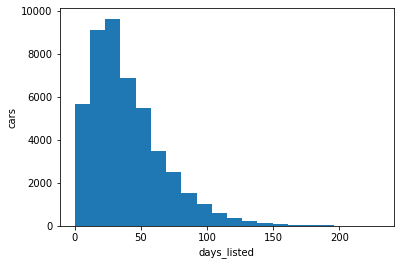

In [46]:
# Step 4. Carry out exploratory data analysis, following the instructions below (section #4)

# outputting days_listed and seeing what we're dealing with
filtered['days_listed'].plot(kind='hist', range=(0, 230), bins=20)

plt.ylabel('cars')
plt.xlabel('days_listed')

print('The mean of how many days listed: ', filtered['days_listed'].mean().round())
print('the median of how many days listed: ', filtered['days_listed'].median().round())

# The typical amount of days an ad is up for is around 40 days. It seems that the majority
# of vehicles ads would be removed quickly, very few would take a long time over 100 days


Average price for for each type:
                    price
type                     
SUV          10253.770792
bus          19276.947368
convertible  13040.407186
coupe        13435.951171
hatchback     6709.169734
mini-van      7720.791513
offroad      14211.205556
other        10054.827273
pickup       14652.532832
sedan         6803.592471
truck        14678.473408
van           8454.321818
wagon         8822.362416

Number of ADs for each type:
SUV            11579
sedan          11528
truck          10661
pickup          6122
coupe           2007
wagon           1490
mini-van        1084
hatchback        978
van              550
convertible      334
other            220
offroad          180
bus               19
Name: type, dtype: int64

Graph of Number of ADs via Types of vehicle:


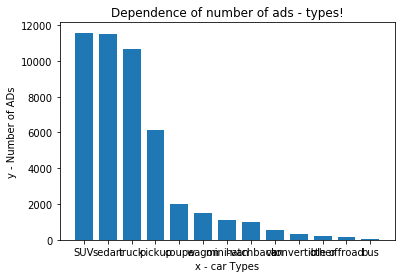

In [47]:
# Step 4. Carry out exploratory data analysis, following the instructions below (section #5)

#used to analyze the number of ads and the average price for each type of vehicle
filtered['type'].value_counts()

filtered_pivot = filtered.pivot_table(index='type', values='price')

print("\nAverage price for for each type:")
print(filtered_pivot)

# print the ad number for the each type
print("\nNumber of ADs for each type:")
print(filtered['type'].value_counts())

print("\nGraph of Number of ADs via Types of vehicle:")

bar_width = 0.75
carType = filtered['type'].value_counts()
plt.bar(carType.index, carType.values, bar_width)

# naming the axis of x and y
plt.xlabel('x - car Types')
plt.ylabel('y - Number of ADs')

# plot the title
plt.title('Dependence of number of ads - types!')
 
# function to show the plot
plt.show()

# The histogram doesn't look pretty, but it does show the two types with the greatest number of ads. 

SUV      11579
sedan    11528
Name: type, dtype: int64


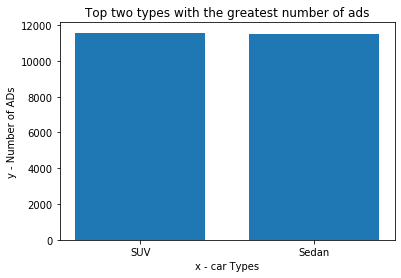

In [48]:
# Select the two top types with most ADs.
bar_width = 0.75
carType = filtered['type'].value_counts().head(2)
print(carType)

chartType = ["SUV", "Sedan"]
plt.bar(chartType, carType.values, bar_width)

# naming the axis of x and y
plt.xlabel('x - car Types')
plt.ylabel('y - Number of ADs')

# plot the title
plt.title('Top two types with the greatest number of ads')
 
# function to show the plot
plt.show()

# The two types from the previous histograms that were most popular were SUVs and Sedans. Both of which will now be
# the main focus

automatic    10960
manual         460
other          159
Name: transmission, dtype: int64


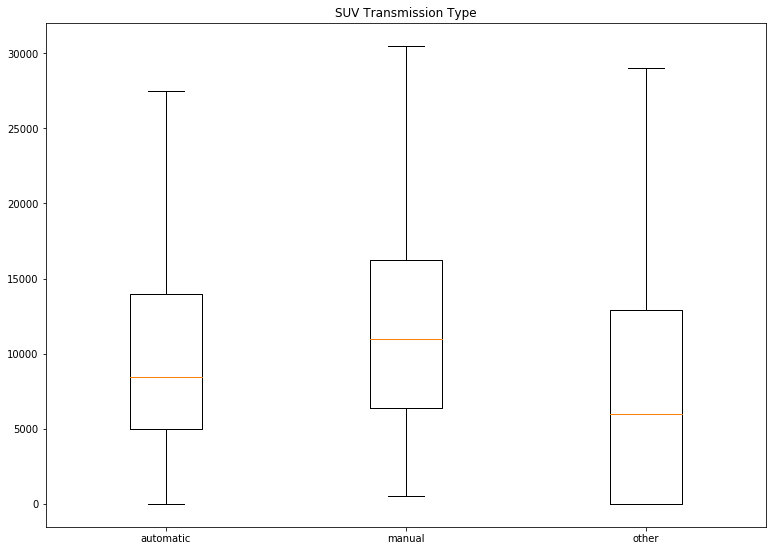

In [79]:
# Step 4. Carry out exploratory data analysis, following the instructions below (section #6)

# get the top #1 type (SUV)
top1type = filtered.query('type == "SUV"')
# get the top #2 type (sedan)
top2type = filtered.query('type == "sedan"')

#checking to see if any values are below 50.
print(top1type['transmission'].value_counts())

#since all transmission types are above 50, we can use all of them
#pulling transmission data from top1 type and assigning each to the following variables
transmission_auto = top1type.query('transmission == "automatic"')
transmission_manual = top1type.query('transmission == "manual"')
transmission_other = top1type.query('transmission == "other"')

#reassign variables to leave one column of price
transmission_auto = transmission_auto['price']
transmission_manual = transmission_manual['price']
transmission_other = transmission_other['price']
transmissions = [transmission_auto, transmission_manual, transmission_other]


#outputting boxplot settings
fig = plt.figure(figsize = (10, 7))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(transmissions, showfliers=False)

ticks = range(1, len(transmissions)+1)
labels = ['automatic', 'manual', 'other']

plt.xticks(ticks,labels)
plt.title('SUV Transmission Type')

plt.show()

# What's interesting about this, is that manual is higher than the other variables

automatic    10839
manual         566
other          123
Name: transmission, dtype: int64


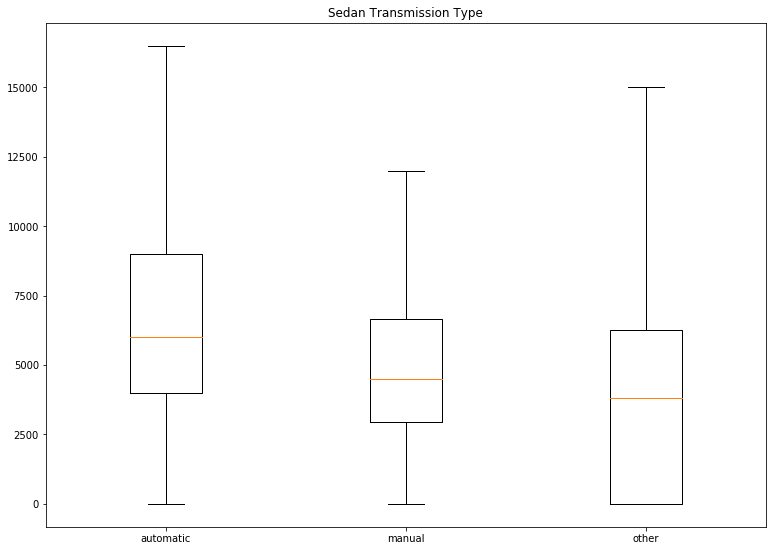

In [81]:
#sedan using top2 variable from before

#checking to see if any values are below 50.
print(top2type['transmission'].value_counts())

#since all transmission types are above 50, we can use all of them
#pulling transmission data from top2 type and assigning each to the following variables
transmission_auto = top2type.query('transmission == "automatic"')
transmission_manual = top2type.query('transmission == "manual"')
transmission_other = top2type.query('transmission == "other"')

#reassign variables to leave one column of price
transmission_auto = transmission_auto['price']
transmission_manual = transmission_manual['price']
transmission_other = transmission_other['price']
transmissions = [transmission_auto, transmission_manual, transmission_other]


#outputting boxplot settings
fig = plt.figure(figsize = (10, 7))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(transmissions, showfliers=False)

ticks = range(1, len(transmissions)+1)
labels = ['automatic', 'manual', 'other']

plt.xticks(ticks,labels)
plt.title('Sedan Transmission Type')

plt.show()

# In comparison to SUV, Manual is lower than others in terms of outliers. 

unknown    2089
black      2047
white      1800
silver     1474
grey       1097
blue        977
red         862
green       423
brown       354
custom      295
orange       78
yellow       44
purple       39
Name: paint_color, dtype: int64


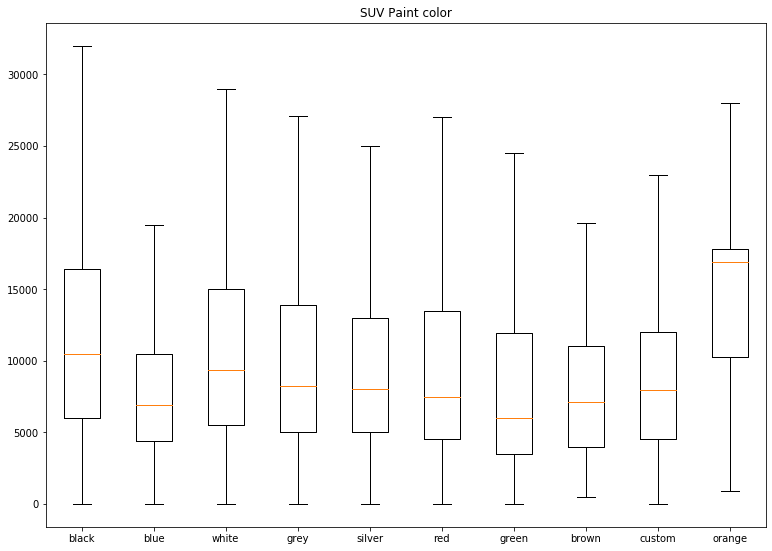

In [82]:
#checking to see what colors are above 50, anything below we don't include in the boxplot
#print(top1type['paint_color'].value_counts())

#checking to see if any values are below 50.
print(top1type['paint_color'].value_counts())

#Yellow and purple do not fit the criterea of 50, so they won't be included. Everything else is included

#pulling transmission data from top1 type and assigning each to the following variables
color_black_price = top1type.query('paint_color == "black"')
color_blue_price = top1type.query('paint_color == "blue"')
color_white_price = top1type.query('paint_color == "white"')
color_grey_price = top1type.query('paint_color == "grey"')
color_silver_price = top1type.query('paint_color == "silver"')
color_red_price = top1type.query('paint_color == "red"')
color_green_price = top1type.query('paint_color == "green"')
color_brown_price = top1type.query('paint_color == "brown"')
color_custom_price = top1type.query('paint_color == "custom"')
color_orange_price = top1type.query('paint_color == "orange"')

#reassign variables to leave one column of price
cblack = color_black_price['price']
cblue = color_blue_price['price']
cwhite = color_white_price['price']
cgrey = color_grey_price['price']
csilver = color_silver_price['price']
cred = color_red_price['price']
cgreen = color_green_price['price']
cbrown = color_brown_price['price']
ccustom = color_custom_price['price']
corange = color_orange_price['price']
color = [cblack, cblue, cwhite, cgrey, csilver, cred, cgreen, cbrown, ccustom, corange]


#outputting boxplot settings
fig = plt.figure(figsize = (10, 7))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(color, showfliers=False)

ticks = range(1, len(color)+1)
labels = ["black", "blue", "white", "grey", "silver", "red", "green", "brown", "custom", "orange"]

plt.xticks(ticks,labels)
plt.title('SUV Paint color')

plt.show()

# Black is a more popular choice in terms of color for SUV. Orange has a higher median, but this could be due to less
# cars chosing orange in general.

unknown    2085
silver     1936
black      1668
grey       1541
white      1410
blue       1185
red         914
custom      277
brown       251
green       204
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64


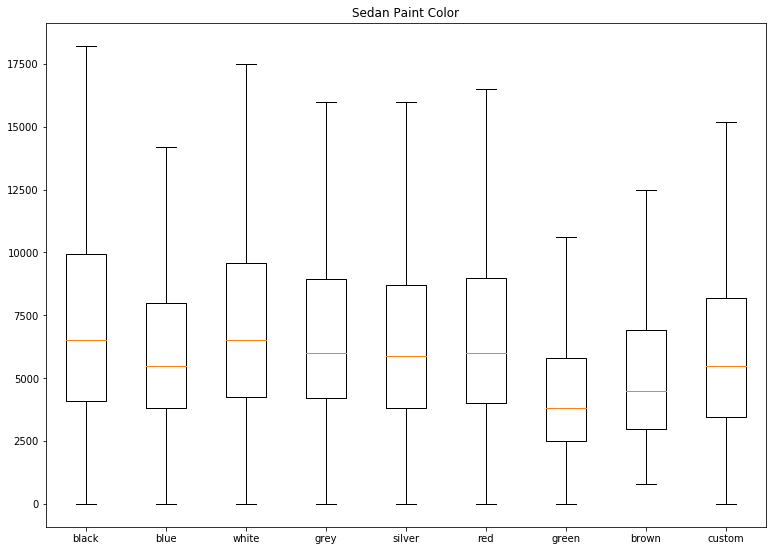

In [83]:
#checking to see what colors are above 50, anything below we don't include in the boxplot
#print(top1type['paint_color'].value_counts())

#checking to see if any values are below 50.
print(top2type['paint_color'].value_counts())

#Purple, yellow, and orange do not fit the criterea of 50, so they won't be included. Everything else is included

#pulling transmission data from top2 type and assigning each to the following variables
color_black_price = top2type.query('paint_color == "black"')
color_blue_price = top2type.query('paint_color == "blue"')
color_white_price = top2type.query('paint_color == "white"')
color_grey_price = top2type.query('paint_color == "grey"')
color_silver_price = top2type.query('paint_color == "silver"')
color_red_price = top2type.query('paint_color == "red"')
color_green_price = top2type.query('paint_color == "green"')
color_brown_price = top2type.query('paint_color == "brown"')
color_custom_price = top2type.query('paint_color == "custom"')

#reassign variables to leave one column of price
cblack = color_black_price['price']
cblue = color_blue_price['price']
cwhite = color_white_price['price']
cgrey = color_grey_price['price']
csilver = color_silver_price['price']
cred = color_red_price['price']
cgreen = color_green_price['price']
cbrown = color_brown_price['price']
ccustom = color_custom_price['price']
color = [cblack, cblue, cwhite, cgrey, csilver, cred, cgreen, cbrown, ccustom]


#outputting boxplot settings
fig = plt.figure(figsize = (10, 7))

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(color, showfliers=False)

ticks = range(1, len(color)+1)
labels = ["black", "blue", "white", "grey", "silver", "red", "green", "brown", "custom"]

plt.xticks(ticks,labels)
plt.title('Sedan Paint Color')

plt.show()

# Black is also a very popular choice in terms of color for Sedans.

(0, 40000)

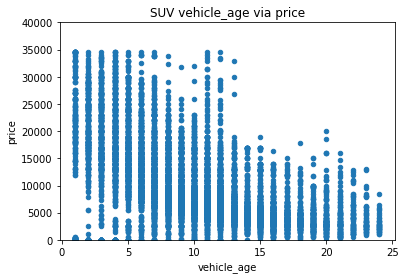

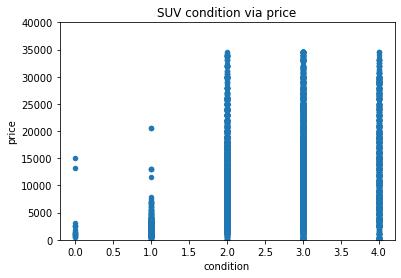

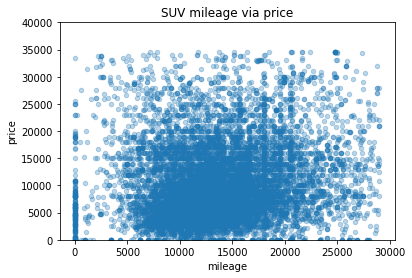

In [53]:
#scatterplot for vehicle age, condition, mileage for SUVs

top1type.plot(kind='scatter', x='vehicle_age', y='price', title='SUV vehicle_age via price')
plt.ylim(ymin=0, ymax=40000)
top1type.plot(kind='scatter', x='condition', y='price', title='SUV condition via price')
plt.ylim(ymin=0, ymax=40000)
top1type.plot(kind='scatter', x='mileage', y='price', alpha=0.3, title='SUV mileage via price')
plt.ylim(ymin=0, ymax=40000)

(0, 35000)

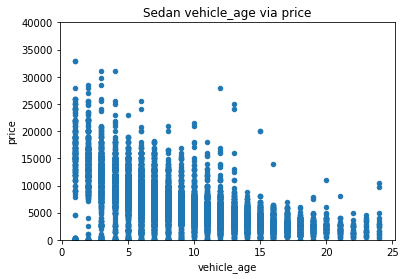

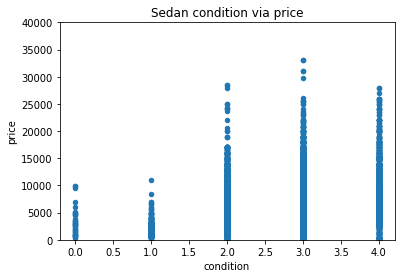

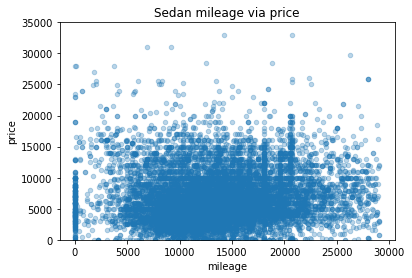

In [54]:
#scatterplot for vehicle age, condition, mileage for Sedans

top2type.plot(kind='scatter', x='vehicle_age', y='price', title='Sedan vehicle_age via price')
plt.ylim(ymin=0, ymax=40000)
top2type.plot(kind='scatter', x='condition', y='price', title='Sedan condition via price')
plt.ylim(ymin=0, ymax=40000)
top2type.plot(kind='scatter', x='mileage', y='price', alpha=0.3, title='Sedan mileage via price')
plt.ylim(ymin=0, ymax=35000)

             condition   mileage  vehicle_age
condition     1.000000  0.054419    -0.404410
mileage       0.054419  1.000000    -0.463692
vehicle_age  -0.404410 -0.463692     1.000000


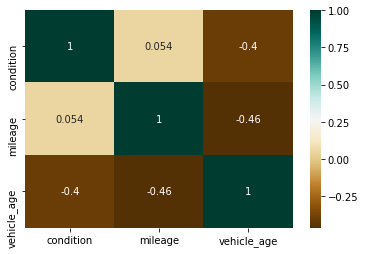

In [55]:
#checking for correlation between condition, mileage, and vehicle age for SUVs

filtered_corr_suv = filtered.query('type == "SUV"')
                      
#pivot table to correlate
filtered_corr_suv = filtered_corr_suv.pivot_table(index = 'price', values = ['vehicle_age', 'mileage', 'condition']) 
filtered_corr_final_suv = filtered_corr_suv.corr()

#printing correlation
print(filtered_corr_final_suv)

#visualizing the correlation data 
sns.heatmap(filtered_corr_final_suv, cmap="BrBG", annot=True)

# Mileage has the least correlation between mileage and condition. In contrast, there is a strong 
# correlation between mileage and vehicle age, even if negative. 

             condition   mileage  vehicle_age
condition     1.000000 -0.022192    -0.468054
mileage      -0.022192  1.000000    -0.309786
vehicle_age  -0.468054 -0.309786     1.000000


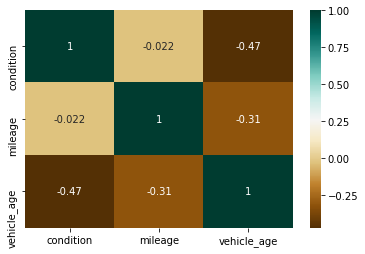

In [56]:
#checking for correlation between condition, mileage, and vehicle age for Sedans

filtered_corr_sedan = filtered.query('type == "sedan"')
                      
#pivot table to correlate
filtered_corr_sedan = filtered_corr_sedan.pivot_table(index = 'price', values = ['vehicle_age', 'mileage', 'condition']) 
filtered_corr_final_sedan = filtered_corr_sedan.corr()

#printing correlation
print(filtered_corr_final_sedan)

#visualizing the correlation data
sns.heatmap(filtered_corr_final_sedan, cmap="BrBG", annot=True)

# Just like SUVs, Mileage has the least correlation between mileage and condition. While the correlation is strong
# between mileage and vehicle age, the correlation between condition and vehicle age also seems to be a bit strong as well.

In [57]:
# In terms of what factors that impacts the price the most, it seems that having a SUV that has good low mileage, is black,
# and is also automatic will yield the best results in terms of price

## Overall conclusion

Throughout this entire project, I didn't find many anomalies in data other than missing values, and a misprint in the vehicle name. I fixed the missing values but didn't fix the misprint, due to the name not being important for this project. I also added extra columns to the table regarding when the ad was placed, the vehicle's age, and the vehicle's average mileage per year. As asked, I was also able to replace the string values from the condition column with a numeric scale. 

There are a lot of factors that can influence the price of a vehicle. Such as the vehicle age, the condition of the car, the mileage, the color, the type of vehicle, and what transmission type the vehicle is. From the data I've gathered, it seems that the most popular vehicle shown in ads is an SUV that has good low mileage, has a black paint job, and is also an automatic transmission type. There seems to be a strong correlation between the mileage of the vehicle and the vehicle's age, with a close second being condition of the vehicle and the age. 